====== No Regularization =======
Training MSE:  [2.3071e+00 8.4408e-03 8.3026e-03 1.7348e-03 3.8606e-25 2.3656e-17]
Test MSE:  [ 3.0006  0.0296  0.0301  0.0854  1.0548 10.7674]
====== Regularization =======
Training Loss [4.0068e+00 1.8476e-02 1.6700e-02 4.8940e-03 5.8348e-03 3.6308e-03]
Training MSE:  [2.3586e+00 8.4565e-03 8.3560e-03 1.8080e-03 7.2650e-04 1.9348e-04]
Test MSE:  [3.2756 0.0302 0.0314 0.0939 0.4369 6.0202]


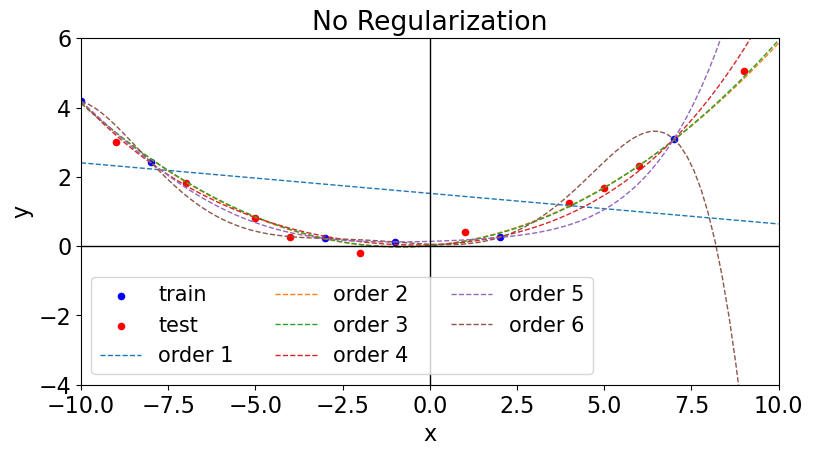

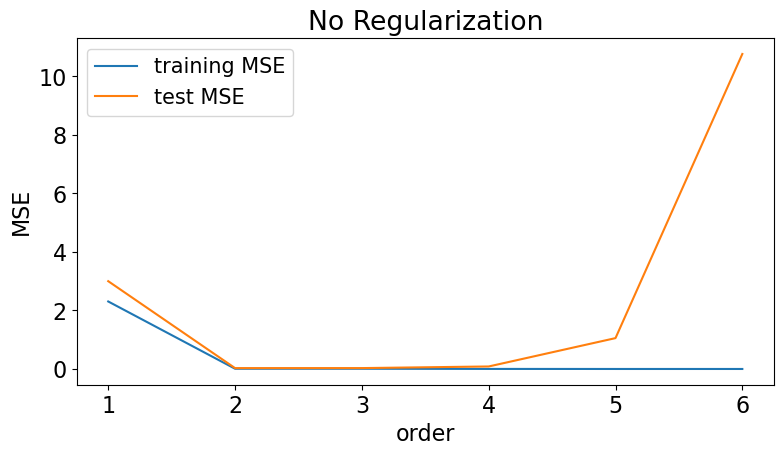

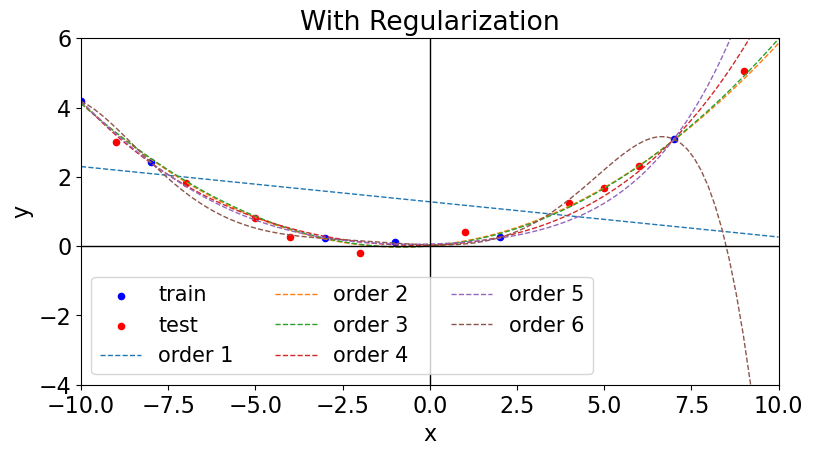

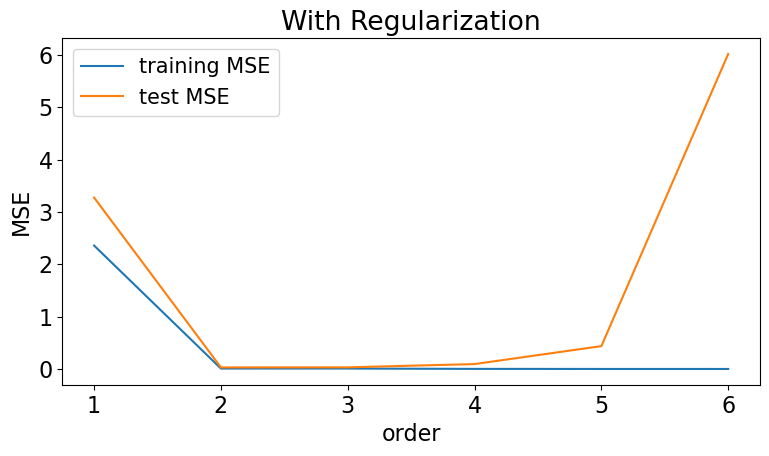

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jul  4 08:42:16 2020

@author: thomas
"""

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from numpy.linalg import inv

def Tut7_Q2():
    
    '''
    %true model: y = f(x) + epsilon = 0.01 + 0.1x + 0.05x^2 + 0.2*randn(1)
    '''

    # simulation parameters
    max_order = 6
    reg = 1
    np.set_printoptions(precision=4)

    # training data
    x = np.array([-10, -8, -3, -1, 2, 7])
    y = np.array([4.18, 2.42, 0.22, 0.12, 0.25, 3.09])
    
    # test data
    xt = np.array([-9, -7, -5, -4, -2, 1, 4, 5, 6, 9])
    yt = np.array([3, 1.81, 0.80, 0.25, -0.19, 0.4, 1.24, 1.68, 2.32, 5.05])
    
    # data for plotting curves
    x_plot = np.linspace(-10, 10, 100)
    
    # Create regressors
    P_train_list = CreateRegressors(x, max_order)
    P_test_list  = CreateRegressors(xt, max_order)
    P_plot_list  = CreateRegressors(x_plot, max_order)
    
    #######################
    # Q2 (a)
    #######################
    
    # Estimate coefficients WITHOUT REGULARIZATION
    w_list = EstimateRegressionCoefficients(P_train_list, y)
    
    # Apply prediction: predictions are N x max_order
    y_train_pred = PerformPrediction(P_train_list, w_list)
    y_test_pred  = PerformPrediction(P_test_list, w_list)
    y_plot_pred  = PerformPrediction(P_plot_list, w_list)

    # Plot the predicted curves 
    plt.figure(0, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    plt.scatter(x, y, s=20, marker='o', c='blue', label='train')
    plt.scatter(xt, yt, s=20, marker='o', c='red', label='test')    
    for order in range(len(w_list)):
        plt.plot(x_plot, y_plot_pred[:, order], linestyle='--', linewidth=1, label='order '+str(order+1))
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.title('No Regularization')
    plt.plot([-10, 10],[0,0], c='black', linewidth=1)
    plt.plot([0, 0],[-4,6], c='black', linewidth=1)
    plt.xlim(-10, 10) 
    plt.ylim(-4, 6)
    plt.legend(loc='lower left',ncol=3, fontsize=15)
    plt.savefig('fig_tut7_Q2a_curves.png')

    # Compute MSE
    train_error = y_train_pred - np.matlib.repmat(y, max_order, 1).T
    train_MSE   = np.power(train_error, 2)
    train_MSE   = np.mean(train_MSE, 0)

    test_error = y_test_pred - np.matlib.repmat(yt, max_order, 1).T
    test_MSE   = np.power(test_error, 2)
    test_MSE   = np.mean(test_MSE, 0)

    print('====== No Regularization =======')
    print('Training MSE: ', train_MSE)
    print('Test MSE: ', test_MSE)

    # Plot MSE
    plt.figure(1, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    plt.plot(np.linspace(1,max_order,max_order), train_MSE, label='training MSE')
    plt.plot(np.linspace(1,max_order,max_order), test_MSE, label='test MSE')
    plt.xlabel('order') 
    plt.ylabel('MSE')
    plt.title('No Regularization')
    plt.legend(loc='upper left', fontsize=15)
    plt.savefig('fig_tut7_Q2a_MSE.png')

    #######################
    # Q2 (b)
    #######################
    
    
    # Estimate coefficients WITH REGULARIZATION
    w_list = EstimateRegressionCoefficients(P_train_list, y, reg) 
    
    # Apply prediction: predictions are N x max_order
    y_train_pred = PerformPrediction(P_train_list, w_list)
    y_test_pred  = PerformPrediction(P_test_list, w_list)
    y_plot_pred  = PerformPrediction(P_plot_list, w_list) 

    # Plot the predicted curves 
    plt.figure(2, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    plt.scatter(x, y, s=20, marker='o', c='blue', label='train')
    plt.scatter(xt, yt, s=20, marker='o', c='red', label='test')    
    for order in range(len(w_list)):
        plt.plot(x_plot, y_plot_pred[:, order], linestyle='--', linewidth=1, label='order '+str(order+1))
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.title('With Regularization')
    plt.plot([-10, 10],[0,0], c='black', linewidth=1)
    plt.plot([0, 0],[-4,6], c='black', linewidth=1)
    plt.xlim(-10, 10) 
    plt.ylim(-4, 6)
    plt.legend(loc='lower left',ncol=3, fontsize=15)
    plt.savefig('fig_tut7_Q2b_curves.png')

    # Compute MSE
    train_error = y_train_pred - np.matlib.repmat(y, max_order, 1).T
    train_MSE   = np.power(train_error, 2)
    train_MSE   = np.mean(train_MSE, 0)

    train_loss = np.zeros(len(w_list))
    for i in range(len(w_list)):
        train_loss[i] = train_MSE[i] + np.sum(reg*np.power(w_list[i], 2))

    test_error = y_test_pred - np.matlib.repmat(yt, max_order, 1).T
    test_MSE   = np.power(test_error, 2)
    test_MSE   = np.mean(test_MSE, 0)

    print('====== Regularization =======')
    print('Training Loss', train_loss)
    print('Training MSE: ', train_MSE)
    print('Test MSE: ', test_MSE)
    
    # Plot MSE
    plt.figure(3, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    plt.plot(np.linspace(1,max_order,max_order), train_MSE, label='training MSE')
    plt.plot(np.linspace(1,max_order,max_order), test_MSE, label='test MSE')
    plt.xlabel('order') 
    plt.ylabel('MSE')
    plt.title('With Regularization')
    plt.legend(loc='upper left', fontsize=15)
    plt.savefig('fig_tut7_Q2b_MSE.png')


def CreateRegressors(x, max_order):
    
    # x is assumed to be array of length N
    # return P = list of regressors based on max_order
    # P[i] are regressors for order i+1 and is of size N x (order+1), where
    # N is number of data points
    
    P = [] #initialize empty list
    for order in range(1, max_order+1): 
        current_regressors = np.zeros([len(x), order+1])
        current_regressors[:,0] = np.ones(len(x))
        for i in range(1, order+1):
            current_regressors[:,i] = np.power(x, i)
        P.append(current_regressors)
        
    return P

def EstimateRegressionCoefficients(P_list, y, reg=None):
    
    # P_list is a list
    # P_list[i] are regressors for order i+1 and is of size N x (order+1), where
    # N is number of data points
    
    w_list = []
    if reg is None:
                
        for P in P_list:           
            if(P.shape[1] > P.shape[0]): #use dual solution                
                w = P.T @ inv(P @ P.T) @ y          
            else: # use primal solution         
                w = (inv(P.T @ P) @ P.T) @ y
            w_list.append(w)
    else:
        
       for P in P_list:
           w = (inv(P.T @ P + reg*np.eye(P.shape[1]) ) @ P.T) @ y
           w_list.append(w)
        
    return w_list
    
    
def PerformPrediction(P_list, w_list):    
    
    # P_list is list of regressors
    # w_list is list of coefficients
    # Output is y_predict_mat which N x max_order, where N is the number of samples
    
    N = P_list[0].shape[0]
    max_order = len(P_list)
    y_predict_mat = np.zeros([N, max_order])
    for order in range(len(w_list)):
        y_predict = np.matmul(P_list[order], w_list[order])
        y_predict_mat[:,order] = y_predict
    
    return y_predict_mat
    

if __name__ == '__main__':
    Tut7_Q2() 
    